In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### <p style="color:red"><b>Well, I tried to find some interesting patterns from the data, but I ended up finding nothing but only a linear positive relationship between date and the Receipt_Count.</b></p>

# 1. Raw Receipt_Count

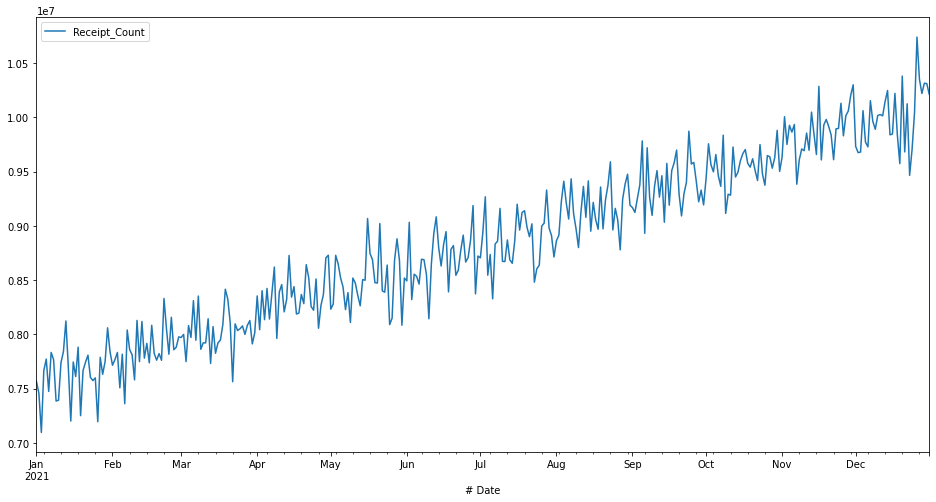

In [2]:
df = pd.read_csv('data_daily.csv', parse_dates=True, index_col='# Date')
df.plot(figsize=(16, 8))

In [3]:
xx = [pd.Timestamp('2021-01-01') + pd.offsets.Day(i) for i in range(730)]
yy = df['Receipt_Count'].to_numpy().tolist() + [np.nan for i in range(365)]

# 2. Moving Average of Receipt_Count

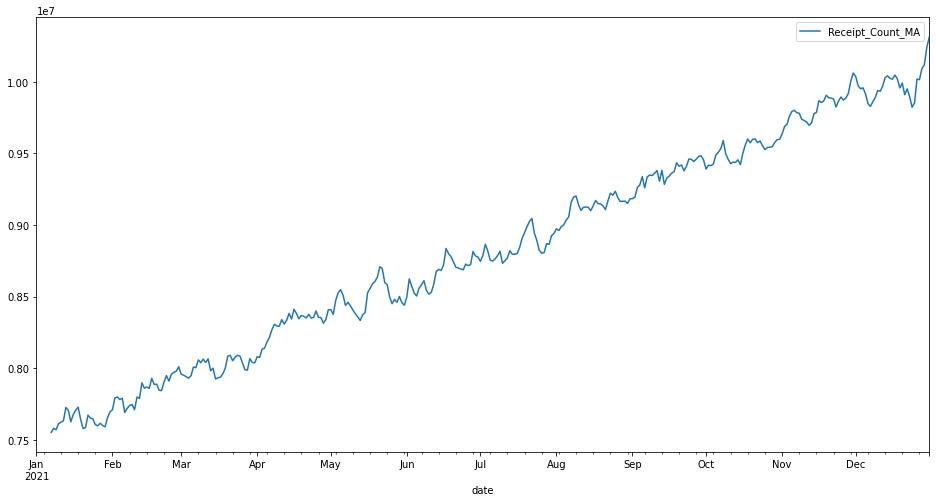

In [4]:
df['Receipt_Count_MA'] = df.rolling(window=7).mean()
df['date'] = df.index
df.plot(x='date', y='Receipt_Count_MA', figsize=(16, 8))

# 3. Monthly Boxplot

## 3.1 Raw Receipt_Count

/Users/lirunfeng/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


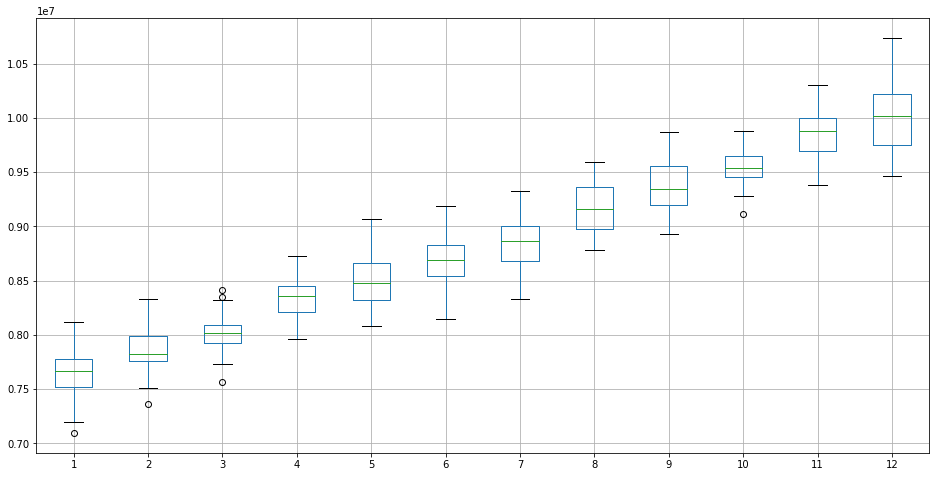

In [5]:
groups = df['Receipt_Count'].groupby(pd.Grouper(freq='M'))

months = pd.DataFrame()
for name, group in groups:
    # Fill up the remaining rows
    monthly_values = group.values
    if len(monthly_values) < 31:
        monthly_values = np.append(group.values, [np.nan for _ in range(31-len(group.values))])
    months[name.month] = monthly_values

months.boxplot(figsize=(16, 8))

### 3.1.1 Monthly Sum

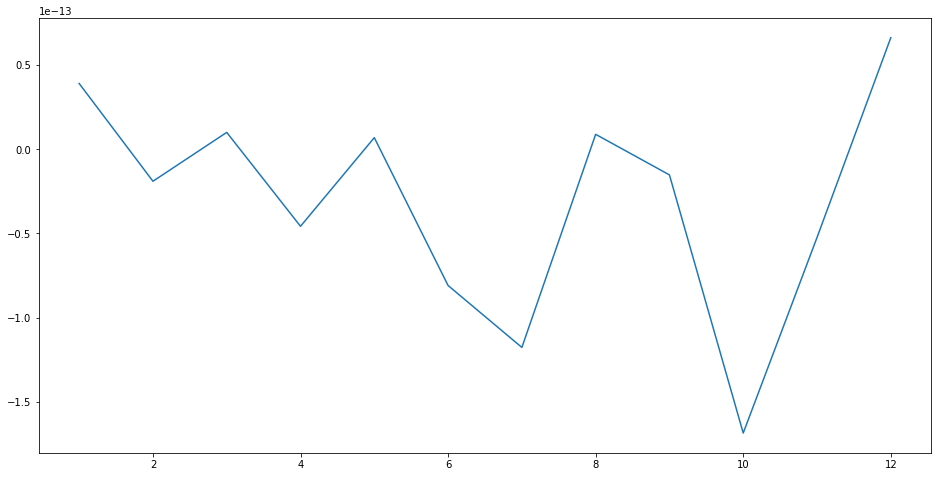

In [11]:
months.sum().plot(figsize=(16,8))

## 3.2 Normalized Receipt_Count

/Users/lirunfeng/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


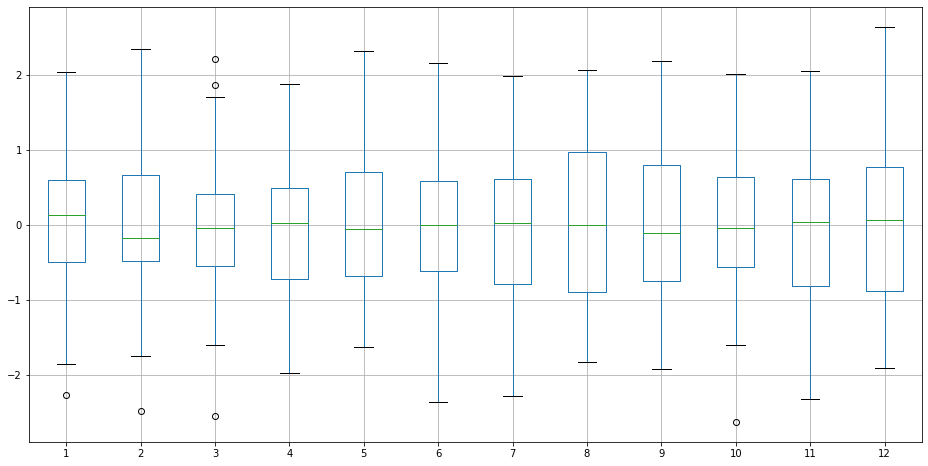

In [7]:
groups = df['Receipt_Count'].groupby(pd.Grouper(freq='M'))

months = pd.DataFrame()
for name, group in groups:
    # Calculate normalized values
    normalized_monthly_values = (group.values-group.values.mean())/group.values.std()
    
    # Fill in the remaining rows
    if len(normalized_monthly_values) < 31:
        normalized_monthly_values = np.append(
            normalized_monthly_values, 
            [np.nan for _ in range(31-len(group.values))])
    months[name.month] = normalized_monthly_values

months.boxplot(figsize=(16, 8))

# 4. Daily Boxplot Per Week

In [8]:
df['day_name_of_week'] = df['date'].dt.day_name()
df['day_number_of_week'] = df['date'].dt.day_of_week+1
df.head()

,Receipt_Count,Receipt_Count_MA,date,day_name_of_week,day_number_of_week
# Date,,,,,
2021-01-01,7564766,NaN,2021-01-01,Friday,5
2021-01-02,7455524,NaN,2021-01-02,Saturday,6
2021-01-03,7095414,NaN,2021-01-03,Sunday,7
2021-01-04,7666163,NaN,2021-01-04,Monday,1
2021-01-05,7771289,NaN,2021-01-05,Tuesday,2


/Users/lirunfeng/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


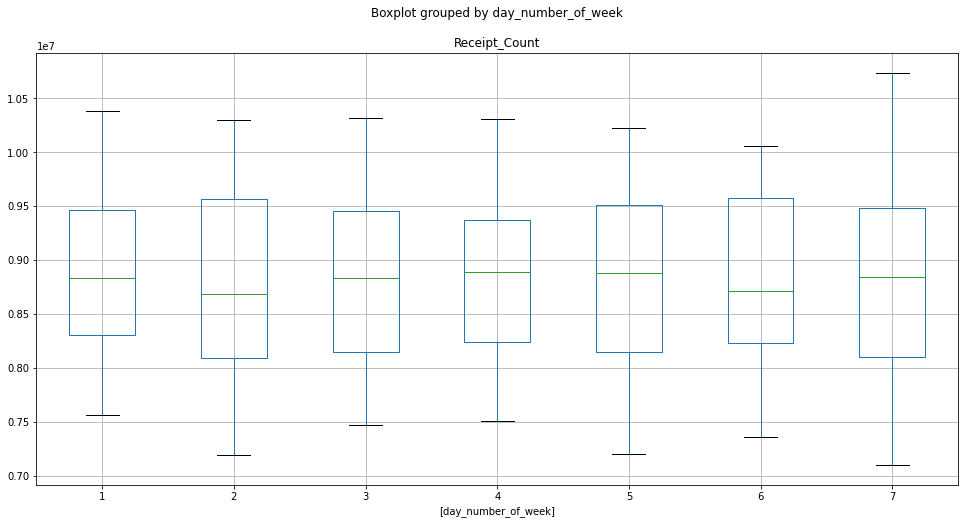

In [9]:
# 1->Monday, ..., 7->Sunday
df[['Receipt_Count', 'day_number_of_week']].boxplot(by='day_number_of_week', figsize=(16,8))

# 5. Lag Plot

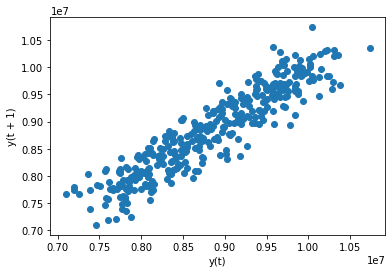

In [10]:
pd.plotting.lag_plot(df['Receipt_Count']) # By default, lag = 1